In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
import h5py
from keras.utils import np_utils, to_categorical
from keras.models import model_from_json
import csv

/home/constant/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [4]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [6]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [ ]:
#model without half time statistics

In [56]:
X = fixtures[[0,1,4,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_without_halftime = X.ix[600:,]
Ytest_without_halftime = to_categorical(Y.ix[600:,], num_classes=7)

/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [83]:
without_half_time_details_model = Sequential()
without_half_time_details_model.add(Dense(100, input_dim=5, activation='relu'))
without_half_time_details_model.add(Dense(500, activation='relu'))
without_half_time_details_model.add(Dense(500, activation='sigmoid'))
without_half_time_details_model.add(Dense(7, activation='softmax'))
without_half_time_details_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [84]:
without_half_time_details_history = without_half_time_details_model.fit(Xtrain, Ytrain, epochs=2500, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/2500
 - 1s - loss: 2.6157 - acc: 0.0071 - val_loss: 2.1658 - val_acc: 0.0055
Epoch 2/2500
 - 0s - loss: 2.1840 - acc: 0.0071 - val_loss: 1.9537 - val_acc: 0.0055
Epoch 3/2500
 - 0s - loss: 1.9795 - acc: 0.0071 - val_loss: 1.8369 - val_acc: 0.3149
Epoch 4/2500
 - 0s - loss: 1.8684 - acc: 0.2762 - val_loss: 1.7649 - val_acc: 0.3149
Epoch 5/2500
 - 0s - loss: 1.8008 - acc: 0.2762 - val_loss: 1.7171 - val_acc: 0.3149
Epoch 6/2500
 - 0s - loss: 1.7565 - acc: 0.2762 - val_loss: 1.6837 - val_acc: 0.3149
Epoch 7/2500
 - 0s - loss: 1.7259 - acc: 0.2762 - val_loss: 1.6594 - val_acc: 0.3149
Epoch 8/2500
 - 0s - loss: 1.7040 - acc: 0.2762 - val_loss: 1.6411 - val_acc: 0.3149
Epoch 9/2500
 - 0s - loss: 1.6877 - acc: 0.2810 - val_loss: 1.6269 - val_acc: 0.3149
Epoch 10/2500
 - 0s - loss: 1.6752 - acc: 0.2810 - val_loss: 1.6156 - val_acc: 0.3149
Epoch 11/2500
 - 0s - loss: 1.6654 - acc: 0.2810 - val_loss: 1.6064 - val_acc: 0.3149
Epoch 12/2500
 - 

Epoch 96/2500
 - 0s - loss: 1.6027 - acc: 0.2905 - val_loss: 1.5360 - val_acc: 0.3204
Epoch 97/2500
 - 0s - loss: 1.6026 - acc: 0.2905 - val_loss: 1.5359 - val_acc: 0.3204
Epoch 98/2500
 - 0s - loss: 1.6025 - acc: 0.2905 - val_loss: 1.5359 - val_acc: 0.3204
Epoch 99/2500
 - 0s - loss: 1.6025 - acc: 0.2905 - val_loss: 1.5358 - val_acc: 0.3204
Epoch 100/2500
 - 0s - loss: 1.6024 - acc: 0.2905 - val_loss: 1.5357 - val_acc: 0.3204
Epoch 101/2500
 - 0s - loss: 1.6023 - acc: 0.2905 - val_loss: 1.5357 - val_acc: 0.3204
Epoch 102/2500
 - 0s - loss: 1.6023 - acc: 0.2905 - val_loss: 1.5356 - val_acc: 0.3204
Epoch 103/2500
 - 0s - loss: 1.6022 - acc: 0.2929 - val_loss: 1.5355 - val_acc: 0.3204
Epoch 104/2500
 - 0s - loss: 1.6021 - acc: 0.2929 - val_loss: 1.5355 - val_acc: 0.3204
Epoch 105/2500
 - 0s - loss: 1.6021 - acc: 0.2929 - val_loss: 1.5354 - val_acc: 0.3204
Epoch 106/2500
 - 0s - loss: 1.6020 - acc: 0.2929 - val_loss: 1.5353 - val_acc: 0.3204
Epoch 107/2500
 - 0s - loss: 1.6020 - acc: 0.29

Epoch 191/2500
 - 0s - loss: 1.5976 - acc: 0.3095 - val_loss: 1.5314 - val_acc: 0.3094
Epoch 192/2500
 - 0s - loss: 1.5975 - acc: 0.3095 - val_loss: 1.5314 - val_acc: 0.3094
Epoch 193/2500
 - 0s - loss: 1.5975 - acc: 0.3095 - val_loss: 1.5313 - val_acc: 0.3094
Epoch 194/2500
 - 0s - loss: 1.5975 - acc: 0.3071 - val_loss: 1.5313 - val_acc: 0.3094
Epoch 195/2500
 - 0s - loss: 1.5974 - acc: 0.3071 - val_loss: 1.5312 - val_acc: 0.3094
Epoch 196/2500
 - 0s - loss: 1.5974 - acc: 0.3071 - val_loss: 1.5312 - val_acc: 0.3094
Epoch 197/2500
 - 0s - loss: 1.5973 - acc: 0.3071 - val_loss: 1.5312 - val_acc: 0.3094
Epoch 198/2500
 - 0s - loss: 1.5973 - acc: 0.3071 - val_loss: 1.5311 - val_acc: 0.3094
Epoch 199/2500
 - 0s - loss: 1.5972 - acc: 0.3071 - val_loss: 1.5311 - val_acc: 0.3094
Epoch 200/2500
 - 0s - loss: 1.5972 - acc: 0.3048 - val_loss: 1.5311 - val_acc: 0.3094
Epoch 201/2500
 - 0s - loss: 1.5971 - acc: 0.3048 - val_loss: 1.5310 - val_acc: 0.3094
Epoch 202/2500
 - 0s - loss: 1.5971 - acc: 

 - 0s - loss: 1.5932 - acc: 0.3071 - val_loss: 1.5281 - val_acc: 0.3149
Epoch 286/2500
 - 0s - loss: 1.5932 - acc: 0.3071 - val_loss: 1.5280 - val_acc: 0.3149
Epoch 287/2500
 - 0s - loss: 1.5932 - acc: 0.3071 - val_loss: 1.5280 - val_acc: 0.3149
Epoch 288/2500
 - 0s - loss: 1.5931 - acc: 0.3071 - val_loss: 1.5280 - val_acc: 0.3149
Epoch 289/2500
 - 0s - loss: 1.5931 - acc: 0.3071 - val_loss: 1.5279 - val_acc: 0.3149
Epoch 290/2500
 - 0s - loss: 1.5930 - acc: 0.3071 - val_loss: 1.5279 - val_acc: 0.3149
Epoch 291/2500
 - 0s - loss: 1.5930 - acc: 0.3071 - val_loss: 1.5278 - val_acc: 0.3149
Epoch 292/2500
 - 0s - loss: 1.5929 - acc: 0.3071 - val_loss: 1.5278 - val_acc: 0.3149
Epoch 293/2500
 - 0s - loss: 1.5929 - acc: 0.3071 - val_loss: 1.5278 - val_acc: 0.3149
Epoch 294/2500
 - 0s - loss: 1.5928 - acc: 0.3071 - val_loss: 1.5277 - val_acc: 0.3149
Epoch 295/2500
 - 0s - loss: 1.5928 - acc: 0.3071 - val_loss: 1.5277 - val_acc: 0.3149
Epoch 296/2500
 - 0s - loss: 1.5927 - acc: 0.3071 - val_lo

Epoch 380/2500
 - 0s - loss: 1.5889 - acc: 0.3119 - val_loss: 1.5248 - val_acc: 0.3204
Epoch 381/2500
 - 0s - loss: 1.5889 - acc: 0.3119 - val_loss: 1.5247 - val_acc: 0.3204
Epoch 382/2500
 - 0s - loss: 1.5888 - acc: 0.3119 - val_loss: 1.5247 - val_acc: 0.3204
Epoch 383/2500
 - 0s - loss: 1.5888 - acc: 0.3119 - val_loss: 1.5247 - val_acc: 0.3204
Epoch 384/2500
 - 0s - loss: 1.5887 - acc: 0.3119 - val_loss: 1.5246 - val_acc: 0.3204
Epoch 385/2500
 - 0s - loss: 1.5887 - acc: 0.3119 - val_loss: 1.5246 - val_acc: 0.3204
Epoch 386/2500
 - 0s - loss: 1.5887 - acc: 0.3119 - val_loss: 1.5246 - val_acc: 0.3204
Epoch 387/2500
 - 0s - loss: 1.5886 - acc: 0.3119 - val_loss: 1.5245 - val_acc: 0.3204
Epoch 388/2500
 - 0s - loss: 1.5886 - acc: 0.3119 - val_loss: 1.5245 - val_acc: 0.3204
Epoch 389/2500
 - 0s - loss: 1.5885 - acc: 0.3119 - val_loss: 1.5245 - val_acc: 0.3204
Epoch 390/2500
 - 0s - loss: 1.5885 - acc: 0.3119 - val_loss: 1.5244 - val_acc: 0.3204
Epoch 391/2500
 - 0s - loss: 1.5884 - acc: 

 - 0s - loss: 1.5846 - acc: 0.3143 - val_loss: 1.5215 - val_acc: 0.3149
Epoch 475/2500
 - 0s - loss: 1.5846 - acc: 0.3167 - val_loss: 1.5215 - val_acc: 0.3149
Epoch 476/2500
 - 0s - loss: 1.5845 - acc: 0.3167 - val_loss: 1.5214 - val_acc: 0.3149
Epoch 477/2500
 - 0s - loss: 1.5845 - acc: 0.3167 - val_loss: 1.5214 - val_acc: 0.3149
Epoch 478/2500
 - 0s - loss: 1.5845 - acc: 0.3167 - val_loss: 1.5214 - val_acc: 0.3149
Epoch 479/2500
 - 0s - loss: 1.5844 - acc: 0.3167 - val_loss: 1.5213 - val_acc: 0.3149
Epoch 480/2500
 - 0s - loss: 1.5844 - acc: 0.3190 - val_loss: 1.5213 - val_acc: 0.3149
Epoch 481/2500
 - 0s - loss: 1.5843 - acc: 0.3190 - val_loss: 1.5213 - val_acc: 0.3149
Epoch 482/2500
 - 0s - loss: 1.5843 - acc: 0.3190 - val_loss: 1.5212 - val_acc: 0.3149
Epoch 483/2500
 - 0s - loss: 1.5842 - acc: 0.3190 - val_loss: 1.5212 - val_acc: 0.3149
Epoch 484/2500
 - 0s - loss: 1.5842 - acc: 0.3190 - val_loss: 1.5212 - val_acc: 0.3149
Epoch 485/2500
 - 0s - loss: 1.5841 - acc: 0.3190 - val_lo

Epoch 569/2500
 - 0s - loss: 1.5802 - acc: 0.3143 - val_loss: 1.5181 - val_acc: 0.3039
Epoch 570/2500
 - 0s - loss: 1.5802 - acc: 0.3143 - val_loss: 1.5181 - val_acc: 0.3039
Epoch 571/2500
 - 0s - loss: 1.5801 - acc: 0.3143 - val_loss: 1.5181 - val_acc: 0.3039
Epoch 572/2500
 - 0s - loss: 1.5801 - acc: 0.3143 - val_loss: 1.5180 - val_acc: 0.3039
Epoch 573/2500
 - 0s - loss: 1.5801 - acc: 0.3119 - val_loss: 1.5180 - val_acc: 0.3039
Epoch 574/2500
 - 0s - loss: 1.5800 - acc: 0.3119 - val_loss: 1.5180 - val_acc: 0.3039
Epoch 575/2500
 - 0s - loss: 1.5800 - acc: 0.3119 - val_loss: 1.5179 - val_acc: 0.3039
Epoch 576/2500
 - 0s - loss: 1.5799 - acc: 0.3119 - val_loss: 1.5179 - val_acc: 0.3039
Epoch 577/2500
 - 0s - loss: 1.5799 - acc: 0.3143 - val_loss: 1.5179 - val_acc: 0.3039
Epoch 578/2500
 - 0s - loss: 1.5798 - acc: 0.3143 - val_loss: 1.5178 - val_acc: 0.3094
Epoch 579/2500
 - 0s - loss: 1.5798 - acc: 0.3143 - val_loss: 1.5178 - val_acc: 0.3094
Epoch 580/2500
 - 0s - loss: 1.5797 - acc: 

 - 0s - loss: 1.5758 - acc: 0.3310 - val_loss: 1.5147 - val_acc: 0.3315
Epoch 664/2500
 - 0s - loss: 1.5757 - acc: 0.3310 - val_loss: 1.5147 - val_acc: 0.3315
Epoch 665/2500
 - 0s - loss: 1.5757 - acc: 0.3310 - val_loss: 1.5146 - val_acc: 0.3315
Epoch 666/2500
 - 0s - loss: 1.5756 - acc: 0.3310 - val_loss: 1.5146 - val_acc: 0.3370
Epoch 667/2500
 - 0s - loss: 1.5756 - acc: 0.3310 - val_loss: 1.5146 - val_acc: 0.3370
Epoch 668/2500
 - 0s - loss: 1.5755 - acc: 0.3310 - val_loss: 1.5145 - val_acc: 0.3370
Epoch 669/2500
 - 0s - loss: 1.5755 - acc: 0.3310 - val_loss: 1.5145 - val_acc: 0.3370
Epoch 670/2500
 - 0s - loss: 1.5755 - acc: 0.3357 - val_loss: 1.5145 - val_acc: 0.3370
Epoch 671/2500
 - 0s - loss: 1.5754 - acc: 0.3381 - val_loss: 1.5144 - val_acc: 0.3315
Epoch 672/2500
 - 0s - loss: 1.5754 - acc: 0.3381 - val_loss: 1.5144 - val_acc: 0.3315
Epoch 673/2500
 - 0s - loss: 1.5753 - acc: 0.3381 - val_loss: 1.5144 - val_acc: 0.3315
Epoch 674/2500
 - 0s - loss: 1.5753 - acc: 0.3381 - val_lo

Epoch 758/2500
 - 0s - loss: 1.5712 - acc: 0.3667 - val_loss: 1.5112 - val_acc: 0.3315
Epoch 759/2500
 - 0s - loss: 1.5711 - acc: 0.3667 - val_loss: 1.5111 - val_acc: 0.3315
Epoch 760/2500
 - 0s - loss: 1.5711 - acc: 0.3667 - val_loss: 1.5111 - val_acc: 0.3315
Epoch 761/2500
 - 0s - loss: 1.5711 - acc: 0.3667 - val_loss: 1.5111 - val_acc: 0.3315
Epoch 762/2500
 - 0s - loss: 1.5710 - acc: 0.3667 - val_loss: 1.5110 - val_acc: 0.3315
Epoch 763/2500
 - 0s - loss: 1.5710 - acc: 0.3667 - val_loss: 1.5110 - val_acc: 0.3315
Epoch 764/2500
 - 0s - loss: 1.5709 - acc: 0.3667 - val_loss: 1.5109 - val_acc: 0.3315
Epoch 765/2500
 - 0s - loss: 1.5709 - acc: 0.3667 - val_loss: 1.5109 - val_acc: 0.3315
Epoch 766/2500
 - 0s - loss: 1.5708 - acc: 0.3667 - val_loss: 1.5109 - val_acc: 0.3315
Epoch 767/2500
 - 0s - loss: 1.5708 - acc: 0.3667 - val_loss: 1.5108 - val_acc: 0.3315
Epoch 768/2500
 - 0s - loss: 1.5707 - acc: 0.3667 - val_loss: 1.5108 - val_acc: 0.3315
Epoch 769/2500
 - 0s - loss: 1.5707 - acc: 

 - 0s - loss: 1.5666 - acc: 0.3714 - val_loss: 1.5075 - val_acc: 0.3370
Epoch 853/2500
 - 0s - loss: 1.5665 - acc: 0.3714 - val_loss: 1.5075 - val_acc: 0.3370
Epoch 854/2500
 - 0s - loss: 1.5665 - acc: 0.3714 - val_loss: 1.5075 - val_acc: 0.3370
Epoch 855/2500
 - 0s - loss: 1.5664 - acc: 0.3714 - val_loss: 1.5074 - val_acc: 0.3370
Epoch 856/2500
 - 0s - loss: 1.5664 - acc: 0.3714 - val_loss: 1.5074 - val_acc: 0.3370
Epoch 857/2500
 - 0s - loss: 1.5663 - acc: 0.3714 - val_loss: 1.5074 - val_acc: 0.3370
Epoch 858/2500
 - 0s - loss: 1.5663 - acc: 0.3714 - val_loss: 1.5073 - val_acc: 0.3370
Epoch 859/2500
 - 0s - loss: 1.5662 - acc: 0.3714 - val_loss: 1.5073 - val_acc: 0.3370
Epoch 860/2500
 - 0s - loss: 1.5662 - acc: 0.3714 - val_loss: 1.5072 - val_acc: 0.3370
Epoch 861/2500
 - 0s - loss: 1.5661 - acc: 0.3714 - val_loss: 1.5072 - val_acc: 0.3370
Epoch 862/2500
 - 0s - loss: 1.5661 - acc: 0.3714 - val_loss: 1.5072 - val_acc: 0.3370
Epoch 863/2500
 - 0s - loss: 1.5660 - acc: 0.3714 - val_lo

Epoch 947/2500
 - 0s - loss: 1.5618 - acc: 0.3714 - val_loss: 1.5038 - val_acc: 0.3370
Epoch 948/2500
 - 0s - loss: 1.5617 - acc: 0.3714 - val_loss: 1.5038 - val_acc: 0.3370
Epoch 949/2500
 - 0s - loss: 1.5617 - acc: 0.3714 - val_loss: 1.5037 - val_acc: 0.3315
Epoch 950/2500
 - 0s - loss: 1.5616 - acc: 0.3714 - val_loss: 1.5037 - val_acc: 0.3315
Epoch 951/2500
 - 0s - loss: 1.5616 - acc: 0.3714 - val_loss: 1.5036 - val_acc: 0.3315
Epoch 952/2500
 - 0s - loss: 1.5615 - acc: 0.3714 - val_loss: 1.5036 - val_acc: 0.3315
Epoch 953/2500
 - 0s - loss: 1.5615 - acc: 0.3714 - val_loss: 1.5036 - val_acc: 0.3315
Epoch 954/2500
 - 0s - loss: 1.5614 - acc: 0.3714 - val_loss: 1.5035 - val_acc: 0.3315
Epoch 955/2500
 - 0s - loss: 1.5614 - acc: 0.3714 - val_loss: 1.5035 - val_acc: 0.3315
Epoch 956/2500
 - 0s - loss: 1.5613 - acc: 0.3714 - val_loss: 1.5034 - val_acc: 0.3315
Epoch 957/2500
 - 0s - loss: 1.5613 - acc: 0.3714 - val_loss: 1.5034 - val_acc: 0.3315
Epoch 958/2500
 - 0s - loss: 1.5612 - acc: 

Epoch 1041/2500
 - 0s - loss: 1.5570 - acc: 0.3738 - val_loss: 1.5000 - val_acc: 0.3370
Epoch 1042/2500
 - 0s - loss: 1.5569 - acc: 0.3738 - val_loss: 1.5000 - val_acc: 0.3370
Epoch 1043/2500
 - 0s - loss: 1.5569 - acc: 0.3738 - val_loss: 1.4999 - val_acc: 0.3370
Epoch 1044/2500
 - 0s - loss: 1.5568 - acc: 0.3738 - val_loss: 1.4999 - val_acc: 0.3370
Epoch 1045/2500
 - 0s - loss: 1.5568 - acc: 0.3738 - val_loss: 1.4999 - val_acc: 0.3370
Epoch 1046/2500
 - 0s - loss: 1.5567 - acc: 0.3738 - val_loss: 1.4998 - val_acc: 0.3370
Epoch 1047/2500
 - 0s - loss: 1.5567 - acc: 0.3738 - val_loss: 1.4998 - val_acc: 0.3370
Epoch 1048/2500
 - 0s - loss: 1.5566 - acc: 0.3738 - val_loss: 1.4997 - val_acc: 0.3370
Epoch 1049/2500
 - 0s - loss: 1.5566 - acc: 0.3738 - val_loss: 1.4997 - val_acc: 0.3370
Epoch 1050/2500
 - 0s - loss: 1.5565 - acc: 0.3738 - val_loss: 1.4997 - val_acc: 0.3370
Epoch 1051/2500
 - 0s - loss: 1.5565 - acc: 0.3738 - val_loss: 1.4996 - val_acc: 0.3370
Epoch 1052/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5522 - acc: 0.3786 - val_loss: 1.4963 - val_acc: 0.3370
Epoch 1135/2500
 - 0s - loss: 1.5522 - acc: 0.3786 - val_loss: 1.4962 - val_acc: 0.3370
Epoch 1136/2500
 - 0s - loss: 1.5521 - acc: 0.3786 - val_loss: 1.4962 - val_acc: 0.3370
Epoch 1137/2500
 - 0s - loss: 1.5521 - acc: 0.3762 - val_loss: 1.4961 - val_acc: 0.3370
Epoch 1138/2500
 - 0s - loss: 1.5520 - acc: 0.3762 - val_loss: 1.4961 - val_acc: 0.3370
Epoch 1139/2500
 - 0s - loss: 1.5520 - acc: 0.3762 - val_loss: 1.4961 - val_acc: 0.3370
Epoch 1140/2500
 - 0s - loss: 1.5519 - acc: 0.3762 - val_loss: 1.4960 - val_acc: 0.3370
Epoch 1141/2500
 - 0s - loss: 1.5519 - acc: 0.3762 - val_loss: 1.4960 - val_acc: 0.3370
Epoch 1142/2500
 - 0s - loss: 1.5518 - acc: 0.3762 - val_loss: 1.4959 - val_acc: 0.3370
Epoch 1143/2500
 - 0s - loss: 1.5518 - acc: 0.3762 - val_loss: 1.4959 - val_acc: 0.3370
Epoch 1144/2500
 - 0s - loss: 1.5517 - acc: 0.3762 - val_loss: 1.4959 - val_acc: 0.3370
Epoch 1145/2500
 - 0s - loss: 1.5517 - acc: 0.37

Epoch 1228/2500
 - 0s - loss: 1.5474 - acc: 0.3738 - val_loss: 1.4925 - val_acc: 0.3425
Epoch 1229/2500
 - 0s - loss: 1.5474 - acc: 0.3738 - val_loss: 1.4924 - val_acc: 0.3425
Epoch 1230/2500
 - 0s - loss: 1.5473 - acc: 0.3738 - val_loss: 1.4924 - val_acc: 0.3425
Epoch 1231/2500
 - 0s - loss: 1.5473 - acc: 0.3738 - val_loss: 1.4924 - val_acc: 0.3425
Epoch 1232/2500
 - 0s - loss: 1.5472 - acc: 0.3738 - val_loss: 1.4923 - val_acc: 0.3425
Epoch 1233/2500
 - 0s - loss: 1.5472 - acc: 0.3738 - val_loss: 1.4923 - val_acc: 0.3425
Epoch 1234/2500
 - 0s - loss: 1.5471 - acc: 0.3738 - val_loss: 1.4922 - val_acc: 0.3425
Epoch 1235/2500
 - 0s - loss: 1.5471 - acc: 0.3738 - val_loss: 1.4922 - val_acc: 0.3425
Epoch 1236/2500
 - 0s - loss: 1.5470 - acc: 0.3738 - val_loss: 1.4922 - val_acc: 0.3425
Epoch 1237/2500
 - 0s - loss: 1.5470 - acc: 0.3738 - val_loss: 1.4921 - val_acc: 0.3425
Epoch 1238/2500
 - 0s - loss: 1.5469 - acc: 0.3738 - val_loss: 1.4921 - val_acc: 0.3425
Epoch 1239/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5427 - acc: 0.3714 - val_loss: 1.4888 - val_acc: 0.3425
Epoch 1322/2500
 - 0s - loss: 1.5427 - acc: 0.3714 - val_loss: 1.4888 - val_acc: 0.3425
Epoch 1323/2500
 - 0s - loss: 1.5426 - acc: 0.3714 - val_loss: 1.4887 - val_acc: 0.3425
Epoch 1324/2500
 - 0s - loss: 1.5426 - acc: 0.3714 - val_loss: 1.4887 - val_acc: 0.3425
Epoch 1325/2500
 - 0s - loss: 1.5425 - acc: 0.3714 - val_loss: 1.4887 - val_acc: 0.3425
Epoch 1326/2500
 - 0s - loss: 1.5425 - acc: 0.3714 - val_loss: 1.4886 - val_acc: 0.3425
Epoch 1327/2500
 - 0s - loss: 1.5424 - acc: 0.3714 - val_loss: 1.4886 - val_acc: 0.3425
Epoch 1328/2500
 - 0s - loss: 1.5424 - acc: 0.3714 - val_loss: 1.4885 - val_acc: 0.3425
Epoch 1329/2500
 - 0s - loss: 1.5423 - acc: 0.3714 - val_loss: 1.4885 - val_acc: 0.3425
Epoch 1330/2500
 - 0s - loss: 1.5423 - acc: 0.3714 - val_loss: 1.4885 - val_acc: 0.3425
Epoch 1331/2500
 - 0s - loss: 1.5422 - acc: 0.3714 - val_loss: 1.4884 - val_acc: 0.3425
Epoch 1332/2500
 - 0s - loss: 1.5422 - acc: 0.37

Epoch 1415/2500
 - 0s - loss: 1.5381 - acc: 0.3714 - val_loss: 1.4852 - val_acc: 0.3425
Epoch 1416/2500
 - 0s - loss: 1.5381 - acc: 0.3714 - val_loss: 1.4852 - val_acc: 0.3425
Epoch 1417/2500
 - 0s - loss: 1.5380 - acc: 0.3714 - val_loss: 1.4852 - val_acc: 0.3425
Epoch 1418/2500
 - 0s - loss: 1.5380 - acc: 0.3714 - val_loss: 1.4851 - val_acc: 0.3425
Epoch 1419/2500
 - 0s - loss: 1.5379 - acc: 0.3714 - val_loss: 1.4851 - val_acc: 0.3425
Epoch 1420/2500
 - 0s - loss: 1.5379 - acc: 0.3714 - val_loss: 1.4851 - val_acc: 0.3425
Epoch 1421/2500
 - 0s - loss: 1.5378 - acc: 0.3714 - val_loss: 1.4850 - val_acc: 0.3425
Epoch 1422/2500
 - 0s - loss: 1.5378 - acc: 0.3738 - val_loss: 1.4850 - val_acc: 0.3425
Epoch 1423/2500
 - 0s - loss: 1.5377 - acc: 0.3738 - val_loss: 1.4850 - val_acc: 0.3425
Epoch 1424/2500
 - 0s - loss: 1.5377 - acc: 0.3738 - val_loss: 1.4849 - val_acc: 0.3425
Epoch 1425/2500
 - 0s - loss: 1.5376 - acc: 0.3738 - val_loss: 1.4849 - val_acc: 0.3425
Epoch 1426/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5338 - acc: 0.3738 - val_loss: 1.4819 - val_acc: 0.3481
Epoch 1509/2500
 - 0s - loss: 1.5337 - acc: 0.3738 - val_loss: 1.4819 - val_acc: 0.3481
Epoch 1510/2500
 - 0s - loss: 1.5337 - acc: 0.3738 - val_loss: 1.4819 - val_acc: 0.3481
Epoch 1511/2500
 - 0s - loss: 1.5336 - acc: 0.3738 - val_loss: 1.4818 - val_acc: 0.3481
Epoch 1512/2500
 - 0s - loss: 1.5336 - acc: 0.3738 - val_loss: 1.4818 - val_acc: 0.3481
Epoch 1513/2500
 - 0s - loss: 1.5335 - acc: 0.3738 - val_loss: 1.4817 - val_acc: 0.3481
Epoch 1514/2500
 - 0s - loss: 1.5335 - acc: 0.3738 - val_loss: 1.4817 - val_acc: 0.3481
Epoch 1515/2500
 - 0s - loss: 1.5334 - acc: 0.3738 - val_loss: 1.4817 - val_acc: 0.3481
Epoch 1516/2500
 - 0s - loss: 1.5334 - acc: 0.3738 - val_loss: 1.4816 - val_acc: 0.3481
Epoch 1517/2500
 - 0s - loss: 1.5333 - acc: 0.3738 - val_loss: 1.4816 - val_acc: 0.3481
Epoch 1518/2500
 - 0s - loss: 1.5333 - acc: 0.3738 - val_loss: 1.4816 - val_acc: 0.3481
Epoch 1519/2500
 - 0s - loss: 1.5332 - acc: 0.37

Epoch 1602/2500
 - 0s - loss: 1.5296 - acc: 0.3714 - val_loss: 1.4788 - val_acc: 0.3481
Epoch 1603/2500
 - 0s - loss: 1.5295 - acc: 0.3714 - val_loss: 1.4788 - val_acc: 0.3481
Epoch 1604/2500
 - 0s - loss: 1.5295 - acc: 0.3714 - val_loss: 1.4788 - val_acc: 0.3481
Epoch 1605/2500
 - 0s - loss: 1.5294 - acc: 0.3714 - val_loss: 1.4787 - val_acc: 0.3481
Epoch 1606/2500
 - 0s - loss: 1.5294 - acc: 0.3714 - val_loss: 1.4787 - val_acc: 0.3481
Epoch 1607/2500
 - 0s - loss: 1.5293 - acc: 0.3714 - val_loss: 1.4787 - val_acc: 0.3481
Epoch 1608/2500
 - 0s - loss: 1.5293 - acc: 0.3714 - val_loss: 1.4786 - val_acc: 0.3481
Epoch 1609/2500
 - 0s - loss: 1.5293 - acc: 0.3738 - val_loss: 1.4786 - val_acc: 0.3481
Epoch 1610/2500
 - 0s - loss: 1.5292 - acc: 0.3738 - val_loss: 1.4786 - val_acc: 0.3481
Epoch 1611/2500
 - 0s - loss: 1.5292 - acc: 0.3738 - val_loss: 1.4785 - val_acc: 0.3481
Epoch 1612/2500
 - 0s - loss: 1.5291 - acc: 0.3738 - val_loss: 1.4785 - val_acc: 0.3481
Epoch 1613/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5257 - acc: 0.3714 - val_loss: 1.4760 - val_acc: 0.3591
Epoch 1696/2500
 - 0s - loss: 1.5256 - acc: 0.3714 - val_loss: 1.4760 - val_acc: 0.3591
Epoch 1697/2500
 - 0s - loss: 1.5256 - acc: 0.3714 - val_loss: 1.4760 - val_acc: 0.3591
Epoch 1698/2500
 - 0s - loss: 1.5255 - acc: 0.3714 - val_loss: 1.4759 - val_acc: 0.3591
Epoch 1699/2500
 - 0s - loss: 1.5255 - acc: 0.3714 - val_loss: 1.4759 - val_acc: 0.3591
Epoch 1700/2500
 - 0s - loss: 1.5255 - acc: 0.3714 - val_loss: 1.4759 - val_acc: 0.3591
Epoch 1701/2500
 - 0s - loss: 1.5254 - acc: 0.3714 - val_loss: 1.4758 - val_acc: 0.3591
Epoch 1702/2500
 - 0s - loss: 1.5254 - acc: 0.3714 - val_loss: 1.4758 - val_acc: 0.3591
Epoch 1703/2500
 - 0s - loss: 1.5253 - acc: 0.3714 - val_loss: 1.4758 - val_acc: 0.3591
Epoch 1704/2500
 - 0s - loss: 1.5253 - acc: 0.3714 - val_loss: 1.4758 - val_acc: 0.3591
Epoch 1705/2500
 - 0s - loss: 1.5253 - acc: 0.3714 - val_loss: 1.4757 - val_acc: 0.3591
Epoch 1706/2500
 - 0s - loss: 1.5252 - acc: 0.37

Epoch 1789/2500
 - 0s - loss: 1.5220 - acc: 0.3714 - val_loss: 1.4735 - val_acc: 0.3425
Epoch 1790/2500
 - 0s - loss: 1.5220 - acc: 0.3714 - val_loss: 1.4735 - val_acc: 0.3425
Epoch 1791/2500
 - 0s - loss: 1.5219 - acc: 0.3714 - val_loss: 1.4734 - val_acc: 0.3425
Epoch 1792/2500
 - 0s - loss: 1.5219 - acc: 0.3714 - val_loss: 1.4734 - val_acc: 0.3425
Epoch 1793/2500
 - 0s - loss: 1.5219 - acc: 0.3714 - val_loss: 1.4734 - val_acc: 0.3425
Epoch 1794/2500
 - 0s - loss: 1.5218 - acc: 0.3714 - val_loss: 1.4734 - val_acc: 0.3425
Epoch 1795/2500
 - 0s - loss: 1.5218 - acc: 0.3714 - val_loss: 1.4733 - val_acc: 0.3425
Epoch 1796/2500
 - 0s - loss: 1.5217 - acc: 0.3714 - val_loss: 1.4733 - val_acc: 0.3425
Epoch 1797/2500
 - 0s - loss: 1.5217 - acc: 0.3714 - val_loss: 1.4733 - val_acc: 0.3425
Epoch 1798/2500
 - 0s - loss: 1.5217 - acc: 0.3714 - val_loss: 1.4733 - val_acc: 0.3425
Epoch 1799/2500
 - 0s - loss: 1.5216 - acc: 0.3714 - val_loss: 1.4732 - val_acc: 0.3425
Epoch 1800/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5186 - acc: 0.3690 - val_loss: 1.4713 - val_acc: 0.3370
Epoch 1883/2500
 - 0s - loss: 1.5186 - acc: 0.3690 - val_loss: 1.4712 - val_acc: 0.3370
Epoch 1884/2500
 - 0s - loss: 1.5186 - acc: 0.3690 - val_loss: 1.4712 - val_acc: 0.3370
Epoch 1885/2500
 - 0s - loss: 1.5185 - acc: 0.3690 - val_loss: 1.4712 - val_acc: 0.3370
Epoch 1886/2500
 - 0s - loss: 1.5185 - acc: 0.3690 - val_loss: 1.4712 - val_acc: 0.3370
Epoch 1887/2500
 - 0s - loss: 1.5185 - acc: 0.3690 - val_loss: 1.4712 - val_acc: 0.3370
Epoch 1888/2500
 - 0s - loss: 1.5184 - acc: 0.3690 - val_loss: 1.4711 - val_acc: 0.3370
Epoch 1889/2500
 - 0s - loss: 1.5184 - acc: 0.3690 - val_loss: 1.4711 - val_acc: 0.3370
Epoch 1890/2500
 - 0s - loss: 1.5184 - acc: 0.3690 - val_loss: 1.4711 - val_acc: 0.3370
Epoch 1891/2500
 - 0s - loss: 1.5183 - acc: 0.3690 - val_loss: 1.4711 - val_acc: 0.3370
Epoch 1892/2500
 - 0s - loss: 1.5183 - acc: 0.3690 - val_loss: 1.4710 - val_acc: 0.3370
Epoch 1893/2500
 - 0s - loss: 1.5183 - acc: 0.36

Epoch 1976/2500
 - 0s - loss: 1.5155 - acc: 0.3714 - val_loss: 1.4693 - val_acc: 0.3370
Epoch 1977/2500
 - 0s - loss: 1.5155 - acc: 0.3714 - val_loss: 1.4693 - val_acc: 0.3370
Epoch 1978/2500
 - 0s - loss: 1.5154 - acc: 0.3714 - val_loss: 1.4693 - val_acc: 0.3370
Epoch 1979/2500
 - 0s - loss: 1.5154 - acc: 0.3714 - val_loss: 1.4693 - val_acc: 0.3370
Epoch 1980/2500
 - 0s - loss: 1.5154 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1981/2500
 - 0s - loss: 1.5153 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1982/2500
 - 0s - loss: 1.5153 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1983/2500
 - 0s - loss: 1.5153 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1984/2500
 - 0s - loss: 1.5152 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1985/2500
 - 0s - loss: 1.5152 - acc: 0.3714 - val_loss: 1.4692 - val_acc: 0.3370
Epoch 1986/2500
 - 0s - loss: 1.5152 - acc: 0.3714 - val_loss: 1.4691 - val_acc: 0.3370
Epoch 1987/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5126 - acc: 0.3690 - val_loss: 1.4677 - val_acc: 0.3315
Epoch 2070/2500
 - 0s - loss: 1.5126 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2071/2500
 - 0s - loss: 1.5125 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2072/2500
 - 0s - loss: 1.5125 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2073/2500
 - 0s - loss: 1.5125 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2074/2500
 - 0s - loss: 1.5124 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2075/2500
 - 0s - loss: 1.5124 - acc: 0.3690 - val_loss: 1.4676 - val_acc: 0.3315
Epoch 2076/2500
 - 0s - loss: 1.5124 - acc: 0.3690 - val_loss: 1.4675 - val_acc: 0.3315
Epoch 2077/2500
 - 0s - loss: 1.5123 - acc: 0.3690 - val_loss: 1.4675 - val_acc: 0.3315
Epoch 2078/2500
 - 0s - loss: 1.5123 - acc: 0.3690 - val_loss: 1.4675 - val_acc: 0.3315
Epoch 2079/2500
 - 0s - loss: 1.5123 - acc: 0.3690 - val_loss: 1.4675 - val_acc: 0.3315
Epoch 2080/2500
 - 0s - loss: 1.5123 - acc: 0.36

Epoch 2163/2500
 - 0s - loss: 1.5098 - acc: 0.3643 - val_loss: 1.4662 - val_acc: 0.3315
Epoch 2164/2500
 - 0s - loss: 1.5098 - acc: 0.3643 - val_loss: 1.4662 - val_acc: 0.3315
Epoch 2165/2500
 - 0s - loss: 1.5098 - acc: 0.3643 - val_loss: 1.4662 - val_acc: 0.3315
Epoch 2166/2500
 - 0s - loss: 1.5097 - acc: 0.3643 - val_loss: 1.4662 - val_acc: 0.3315
Epoch 2167/2500
 - 0s - loss: 1.5097 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2168/2500
 - 0s - loss: 1.5097 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2169/2500
 - 0s - loss: 1.5097 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2170/2500
 - 0s - loss: 1.5096 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2171/2500
 - 0s - loss: 1.5096 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2172/2500
 - 0s - loss: 1.5096 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2173/2500
 - 0s - loss: 1.5096 - acc: 0.3643 - val_loss: 1.4661 - val_acc: 0.3315
Epoch 2174/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5073 - acc: 0.3643 - val_loss: 1.4650 - val_acc: 0.3425
Epoch 2257/2500
 - 0s - loss: 1.5073 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3425
Epoch 2258/2500
 - 0s - loss: 1.5072 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3425
Epoch 2259/2500
 - 0s - loss: 1.5072 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3425
Epoch 2260/2500
 - 0s - loss: 1.5072 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3425
Epoch 2261/2500
 - 0s - loss: 1.5071 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3425
Epoch 2262/2500
 - 0s - loss: 1.5071 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3370
Epoch 2263/2500
 - 0s - loss: 1.5071 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3370
Epoch 2264/2500
 - 0s - loss: 1.5071 - acc: 0.3643 - val_loss: 1.4649 - val_acc: 0.3370
Epoch 2265/2500
 - 0s - loss: 1.5070 - acc: 0.3643 - val_loss: 1.4648 - val_acc: 0.3370
Epoch 2266/2500
 - 0s - loss: 1.5070 - acc: 0.3643 - val_loss: 1.4648 - val_acc: 0.3370
Epoch 2267/2500
 - 0s - loss: 1.5070 - acc: 0.36

Epoch 2350/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4639 - val_acc: 0.3370
Epoch 2351/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4639 - val_acc: 0.3370
Epoch 2352/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2353/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2354/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2355/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2356/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2357/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2358/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2359/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2360/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3370
Epoch 2361/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5025 - acc: 0.3643 - val_loss: 1.4630 - val_acc: 0.3425
Epoch 2444/2500
 - 0s - loss: 1.5025 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2445/2500
 - 0s - loss: 1.5025 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2446/2500
 - 0s - loss: 1.5025 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2447/2500
 - 0s - loss: 1.5024 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2448/2500
 - 0s - loss: 1.5024 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2449/2500
 - 0s - loss: 1.5024 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2450/2500
 - 0s - loss: 1.5024 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2451/2500
 - 0s - loss: 1.5023 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2452/2500
 - 0s - loss: 1.5023 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2453/2500
 - 0s - loss: 1.5023 - acc: 0.3643 - val_loss: 1.4629 - val_acc: 0.3425
Epoch 2454/2500
 - 0s - loss: 1.5023 - acc: 0.36

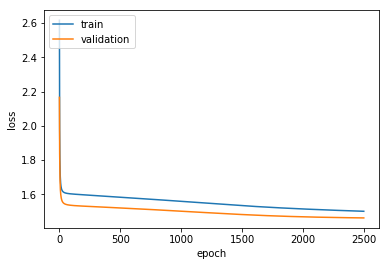

In [86]:
#without half time details loss
plt.plot(without_half_time_details_history.history['loss'])
plt.plot(without_half_time_details_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

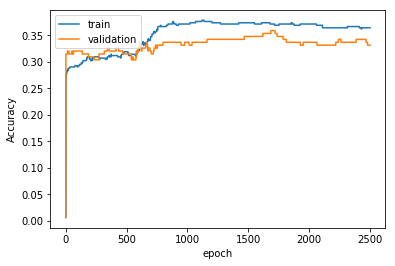

In [87]:
#without halftime details accuracy
plt.plot(without_half_time_details_history.history['acc'])
plt.plot(without_half_time_details_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [89]:
#save the model for prediction
without_halftime_details_model_json = without_half_time_details_model.to_json()
with open("without_halftime_details_model.json", "w") as json_file:
    json_file.write(without_halftime_details_model_json)
# serialize weights to HDF5
without_half_time_details_model.save_weights("without_halftime_details_model.h5")
print("Saved model to disk")

Saved model to disk


In [55]:
# # load without halftime json and create model
# json_file = open('without_halftime_details_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("without_halftime_details_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_without_halftime, Ytest_without_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)

In [90]:

# model with half time statistics
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_with_halftime = X.ix[600:,]
Ytest_with_halftime = to_categorical(Y.ix[600:,], num_classes=7)


/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [91]:
# def regression_model():
# 	model = Sequential()
# 	model.add(Dense(15, input_shape=(8,), kernel_initializer='normal', activation='relu'))
# 	#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(7, kernel_initializer='normal'))
# 	model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# 	return model

In [92]:
# estimator = KerasClassifier(build_fn=regression_model, nb_epoch=100, batch_size=300)#, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, Xtrain, Ytrain, cv=kfold)
# results
# print("Results: %.2f MSE" % (results.mean()))


In [93]:
# #second model
# model = Sequential()
# model.add(Dense(500, input_shape=(8,), kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(100, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# # train model
# history = model.fit(X_scaled, Y_scaled, epochs=100, batch_size=30, verbose=2, validation_split = 0.3)


In [94]:
model_with_half_time_statistics = Sequential()
model_with_half_time_statistics.add(Dense(100, input_dim=8, activation='relu'))
model_with_half_time_statistics.add(Dense(500, activation='relu'))
model_with_half_time_statistics.add(Dense(700, activation='relu'))
model_with_half_time_statistics.add(Dense(7, activation='softmax'))
model_with_half_time_statistics.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [95]:
model_with_half_time_statistics_history = model_with_half_time_statistics.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/1000
 - 1s - loss: 1.9520 - acc: 0.1619 - val_loss: 1.9453 - val_acc: 0.1823
Epoch 2/1000
 - 0s - loss: 1.9451 - acc: 0.1810 - val_loss: 1.9388 - val_acc: 0.2099
Epoch 3/1000
 - 0s - loss: 1.9384 - acc: 0.2048 - val_loss: 1.9324 - val_acc: 0.2320
Epoch 4/1000
 - 0s - loss: 1.9318 - acc: 0.2262 - val_loss: 1.9261 - val_acc: 0.2320
Epoch 5/1000
 - 0s - loss: 1.9254 - acc: 0.2381 - val_loss: 1.9199 - val_acc: 0.2597
Epoch 6/1000
 - 0s - loss: 1.9191 - acc: 0.2619 - val_loss: 1.9139 - val_acc: 0.2652
Epoch 7/1000
 - 0s - loss: 1.9129 - acc: 0.2667 - val_loss: 1.9079 - val_acc: 0.2762
Epoch 8/1000
 - 0s - loss: 1.9069 - acc: 0.2810 - val_loss: 1.9021 - val_acc: 0.2873
Epoch 9/1000
 - 0s - loss: 1.9010 - acc: 0.2833 - val_loss: 1.8964 - val_acc: 0.2983
Epoch 10/1000
 - 0s - loss: 1.8952 - acc: 0.2833 - val_loss: 1.8908 - val_acc: 0.2928
Epoch 11/1000
 - 0s - loss: 1.8895 - acc: 0.2857 - val_loss: 1.8852 - val_acc: 0.2928
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 1.6173 - acc: 0.4310 - val_loss: 1.6059 - val_acc: 0.4033
Epoch 97/1000
 - 0s - loss: 1.6154 - acc: 0.4286 - val_loss: 1.6039 - val_acc: 0.4199
Epoch 98/1000
 - 0s - loss: 1.6135 - acc: 0.4286 - val_loss: 1.6019 - val_acc: 0.4144
Epoch 99/1000
 - 0s - loss: 1.6117 - acc: 0.4286 - val_loss: 1.5999 - val_acc: 0.4144
Epoch 100/1000
 - 0s - loss: 1.6099 - acc: 0.4286 - val_loss: 1.5980 - val_acc: 0.4144
Epoch 101/1000
 - 0s - loss: 1.6081 - acc: 0.4286 - val_loss: 1.5960 - val_acc: 0.4144
Epoch 102/1000
 - 0s - loss: 1.6063 - acc: 0.4310 - val_loss: 1.5941 - val_acc: 0.4144
Epoch 103/1000
 - 0s - loss: 1.6045 - acc: 0.4310 - val_loss: 1.5922 - val_acc: 0.4199
Epoch 104/1000
 - 0s - loss: 1.6028 - acc: 0.4310 - val_loss: 1.5903 - val_acc: 0.4199
Epoch 105/1000
 - 0s - loss: 1.6010 - acc: 0.4333 - val_loss: 1.5884 - val_acc: 0.4254
Epoch 106/1000
 - 0s - loss: 1.5993 - acc: 0.4333 - val_loss: 1.5865 - val_acc: 0.4254
Epoch 107/1000
 - 0s - loss: 1.5975 - acc: 0.43

Epoch 191/1000
 - 0s - loss: 1.4875 - acc: 0.4452 - val_loss: 1.4687 - val_acc: 0.4254
Epoch 192/1000
 - 0s - loss: 1.4865 - acc: 0.4452 - val_loss: 1.4677 - val_acc: 0.4254
Epoch 193/1000
 - 0s - loss: 1.4854 - acc: 0.4452 - val_loss: 1.4666 - val_acc: 0.4254
Epoch 194/1000
 - 0s - loss: 1.4844 - acc: 0.4452 - val_loss: 1.4656 - val_acc: 0.4254
Epoch 195/1000
 - 0s - loss: 1.4834 - acc: 0.4452 - val_loss: 1.4645 - val_acc: 0.4254
Epoch 196/1000
 - 0s - loss: 1.4823 - acc: 0.4452 - val_loss: 1.4635 - val_acc: 0.4199
Epoch 197/1000
 - 0s - loss: 1.4813 - acc: 0.4452 - val_loss: 1.4625 - val_acc: 0.4199
Epoch 198/1000
 - 0s - loss: 1.4803 - acc: 0.4452 - val_loss: 1.4615 - val_acc: 0.4199
Epoch 199/1000
 - 0s - loss: 1.4793 - acc: 0.4452 - val_loss: 1.4604 - val_acc: 0.4199
Epoch 200/1000
 - 0s - loss: 1.4783 - acc: 0.4476 - val_loss: 1.4594 - val_acc: 0.4199
Epoch 201/1000
 - 0s - loss: 1.4773 - acc: 0.4500 - val_loss: 1.4584 - val_acc: 0.4254
Epoch 202/1000
 - 0s - loss: 1.4762 - acc: 

 - 0s - loss: 1.4036 - acc: 0.4643 - val_loss: 1.3876 - val_acc: 0.4309
Epoch 286/1000
 - 0s - loss: 1.4028 - acc: 0.4643 - val_loss: 1.3869 - val_acc: 0.4309
Epoch 287/1000
 - 0s - loss: 1.4020 - acc: 0.4690 - val_loss: 1.3862 - val_acc: 0.4309
Epoch 288/1000
 - 0s - loss: 1.4013 - acc: 0.4667 - val_loss: 1.3855 - val_acc: 0.4309
Epoch 289/1000
 - 0s - loss: 1.4005 - acc: 0.4690 - val_loss: 1.3848 - val_acc: 0.4309
Epoch 290/1000
 - 0s - loss: 1.3997 - acc: 0.4714 - val_loss: 1.3841 - val_acc: 0.4309
Epoch 291/1000
 - 0s - loss: 1.3990 - acc: 0.4714 - val_loss: 1.3834 - val_acc: 0.4309
Epoch 292/1000
 - 0s - loss: 1.3982 - acc: 0.4714 - val_loss: 1.3827 - val_acc: 0.4309
Epoch 293/1000
 - 0s - loss: 1.3975 - acc: 0.4714 - val_loss: 1.3820 - val_acc: 0.4309
Epoch 294/1000
 - 0s - loss: 1.3967 - acc: 0.4714 - val_loss: 1.3813 - val_acc: 0.4309
Epoch 295/1000
 - 0s - loss: 1.3959 - acc: 0.4738 - val_loss: 1.3806 - val_acc: 0.4309
Epoch 296/1000
 - 0s - loss: 1.3952 - acc: 0.4762 - val_lo

Epoch 380/1000
 - 0s - loss: 1.3386 - acc: 0.4857 - val_loss: 1.3306 - val_acc: 0.4088
Epoch 381/1000
 - 0s - loss: 1.3380 - acc: 0.4857 - val_loss: 1.3301 - val_acc: 0.4088
Epoch 382/1000
 - 0s - loss: 1.3374 - acc: 0.4881 - val_loss: 1.3296 - val_acc: 0.4088
Epoch 383/1000
 - 0s - loss: 1.3368 - acc: 0.4881 - val_loss: 1.3291 - val_acc: 0.4088
Epoch 384/1000
 - 0s - loss: 1.3362 - acc: 0.4881 - val_loss: 1.3286 - val_acc: 0.4088
Epoch 385/1000
 - 0s - loss: 1.3356 - acc: 0.4881 - val_loss: 1.3281 - val_acc: 0.4088
Epoch 386/1000
 - 0s - loss: 1.3350 - acc: 0.4881 - val_loss: 1.3276 - val_acc: 0.4033
Epoch 387/1000
 - 0s - loss: 1.3345 - acc: 0.4881 - val_loss: 1.3271 - val_acc: 0.4033
Epoch 388/1000
 - 0s - loss: 1.3339 - acc: 0.4881 - val_loss: 1.3266 - val_acc: 0.4033
Epoch 389/1000
 - 0s - loss: 1.3333 - acc: 0.4881 - val_loss: 1.3262 - val_acc: 0.4033
Epoch 390/1000
 - 0s - loss: 1.3327 - acc: 0.4881 - val_loss: 1.3257 - val_acc: 0.4033
Epoch 391/1000
 - 0s - loss: 1.3321 - acc: 

 - 0s - loss: 1.2891 - acc: 0.4952 - val_loss: 1.2918 - val_acc: 0.4309
Epoch 475/1000
 - 0s - loss: 1.2886 - acc: 0.4952 - val_loss: 1.2915 - val_acc: 0.4309
Epoch 476/1000
 - 0s - loss: 1.2881 - acc: 0.4952 - val_loss: 1.2912 - val_acc: 0.4309
Epoch 477/1000
 - 0s - loss: 1.2877 - acc: 0.4952 - val_loss: 1.2908 - val_acc: 0.4309
Epoch 478/1000
 - 0s - loss: 1.2872 - acc: 0.4952 - val_loss: 1.2905 - val_acc: 0.4309
Epoch 479/1000
 - 0s - loss: 1.2868 - acc: 0.4952 - val_loss: 1.2902 - val_acc: 0.4309
Epoch 480/1000
 - 0s - loss: 1.2863 - acc: 0.4952 - val_loss: 1.2899 - val_acc: 0.4309
Epoch 481/1000
 - 0s - loss: 1.2859 - acc: 0.4952 - val_loss: 1.2895 - val_acc: 0.4309
Epoch 482/1000
 - 0s - loss: 1.2855 - acc: 0.4952 - val_loss: 1.2892 - val_acc: 0.4309
Epoch 483/1000
 - 0s - loss: 1.2850 - acc: 0.4952 - val_loss: 1.2889 - val_acc: 0.4309
Epoch 484/1000
 - 0s - loss: 1.2846 - acc: 0.4952 - val_loss: 1.2886 - val_acc: 0.4309
Epoch 485/1000
 - 0s - loss: 1.2841 - acc: 0.4952 - val_lo

Epoch 569/1000
 - 0s - loss: 1.2514 - acc: 0.4952 - val_loss: 1.2664 - val_acc: 0.4365
Epoch 570/1000
 - 0s - loss: 1.2511 - acc: 0.4952 - val_loss: 1.2662 - val_acc: 0.4365
Epoch 571/1000
 - 0s - loss: 1.2507 - acc: 0.4952 - val_loss: 1.2659 - val_acc: 0.4365
Epoch 572/1000
 - 0s - loss: 1.2504 - acc: 0.4952 - val_loss: 1.2657 - val_acc: 0.4365
Epoch 573/1000
 - 0s - loss: 1.2500 - acc: 0.4952 - val_loss: 1.2655 - val_acc: 0.4365
Epoch 574/1000
 - 0s - loss: 1.2497 - acc: 0.4952 - val_loss: 1.2653 - val_acc: 0.4365
Epoch 575/1000
 - 0s - loss: 1.2494 - acc: 0.4952 - val_loss: 1.2651 - val_acc: 0.4365
Epoch 576/1000
 - 0s - loss: 1.2490 - acc: 0.4952 - val_loss: 1.2649 - val_acc: 0.4365
Epoch 577/1000
 - 0s - loss: 1.2487 - acc: 0.4952 - val_loss: 1.2647 - val_acc: 0.4365
Epoch 578/1000
 - 0s - loss: 1.2484 - acc: 0.4952 - val_loss: 1.2645 - val_acc: 0.4309
Epoch 579/1000
 - 0s - loss: 1.2480 - acc: 0.4952 - val_loss: 1.2643 - val_acc: 0.4309
Epoch 580/1000
 - 0s - loss: 1.2477 - acc: 

 - 0s - loss: 1.2230 - acc: 0.5071 - val_loss: 1.2504 - val_acc: 0.4475
Epoch 664/1000
 - 0s - loss: 1.2228 - acc: 0.5071 - val_loss: 1.2502 - val_acc: 0.4475
Epoch 665/1000
 - 0s - loss: 1.2225 - acc: 0.5071 - val_loss: 1.2501 - val_acc: 0.4475
Epoch 666/1000
 - 0s - loss: 1.2222 - acc: 0.5071 - val_loss: 1.2500 - val_acc: 0.4475
Epoch 667/1000
 - 0s - loss: 1.2220 - acc: 0.5071 - val_loss: 1.2498 - val_acc: 0.4475
Epoch 668/1000
 - 0s - loss: 1.2217 - acc: 0.5095 - val_loss: 1.2497 - val_acc: 0.4475
Epoch 669/1000
 - 0s - loss: 1.2214 - acc: 0.5095 - val_loss: 1.2496 - val_acc: 0.4475
Epoch 670/1000
 - 0s - loss: 1.2212 - acc: 0.5095 - val_loss: 1.2495 - val_acc: 0.4475
Epoch 671/1000
 - 0s - loss: 1.2209 - acc: 0.5095 - val_loss: 1.2493 - val_acc: 0.4475
Epoch 672/1000
 - 0s - loss: 1.2207 - acc: 0.5095 - val_loss: 1.2492 - val_acc: 0.4475
Epoch 673/1000
 - 0s - loss: 1.2204 - acc: 0.5095 - val_loss: 1.2491 - val_acc: 0.4475
Epoch 674/1000
 - 0s - loss: 1.2201 - acc: 0.5095 - val_lo

Epoch 758/1000
 - 0s - loss: 1.2002 - acc: 0.5143 - val_loss: 1.2401 - val_acc: 0.4475
Epoch 759/1000
 - 0s - loss: 1.2000 - acc: 0.5143 - val_loss: 1.2400 - val_acc: 0.4475
Epoch 760/1000
 - 0s - loss: 1.1998 - acc: 0.5143 - val_loss: 1.2399 - val_acc: 0.4475
Epoch 761/1000
 - 0s - loss: 1.1996 - acc: 0.5143 - val_loss: 1.2398 - val_acc: 0.4475
Epoch 762/1000
 - 0s - loss: 1.1993 - acc: 0.5190 - val_loss: 1.2397 - val_acc: 0.4530
Epoch 763/1000
 - 0s - loss: 1.1991 - acc: 0.5190 - val_loss: 1.2396 - val_acc: 0.4530
Epoch 764/1000
 - 0s - loss: 1.1989 - acc: 0.5190 - val_loss: 1.2396 - val_acc: 0.4530
Epoch 765/1000
 - 0s - loss: 1.1987 - acc: 0.5190 - val_loss: 1.2395 - val_acc: 0.4475
Epoch 766/1000
 - 0s - loss: 1.1985 - acc: 0.5190 - val_loss: 1.2394 - val_acc: 0.4475
Epoch 767/1000
 - 0s - loss: 1.1983 - acc: 0.5190 - val_loss: 1.2393 - val_acc: 0.4475
Epoch 768/1000
 - 0s - loss: 1.1981 - acc: 0.5167 - val_loss: 1.2392 - val_acc: 0.4475
Epoch 769/1000
 - 0s - loss: 1.1979 - acc: 

Epoch 853/1000
 - 0s - loss: 1.1813 - acc: 0.5262 - val_loss: 1.2332 - val_acc: 0.4475
Epoch 854/1000
 - 0s - loss: 1.1811 - acc: 0.5262 - val_loss: 1.2332 - val_acc: 0.4475
Epoch 855/1000
 - 0s - loss: 1.1809 - acc: 0.5262 - val_loss: 1.2331 - val_acc: 0.4475
Epoch 856/1000
 - 0s - loss: 1.1807 - acc: 0.5262 - val_loss: 1.2331 - val_acc: 0.4475
Epoch 857/1000
 - 0s - loss: 1.1805 - acc: 0.5262 - val_loss: 1.2330 - val_acc: 0.4475
Epoch 858/1000
 - 0s - loss: 1.1803 - acc: 0.5262 - val_loss: 1.2330 - val_acc: 0.4475
Epoch 859/1000
 - 0s - loss: 1.1802 - acc: 0.5262 - val_loss: 1.2329 - val_acc: 0.4475
Epoch 860/1000
 - 0s - loss: 1.1800 - acc: 0.5262 - val_loss: 1.2328 - val_acc: 0.4475
Epoch 861/1000
 - 0s - loss: 1.1798 - acc: 0.5262 - val_loss: 1.2328 - val_acc: 0.4475
Epoch 862/1000
 - 0s - loss: 1.1796 - acc: 0.5262 - val_loss: 1.2327 - val_acc: 0.4475
Epoch 863/1000
 - 0s - loss: 1.1794 - acc: 0.5238 - val_loss: 1.2327 - val_acc: 0.4475
Epoch 864/1000
 - 0s - loss: 1.1793 - acc: 

 - 0s - loss: 1.1651 - acc: 0.5310 - val_loss: 1.2285 - val_acc: 0.4475
Epoch 948/1000
 - 0s - loss: 1.1649 - acc: 0.5310 - val_loss: 1.2285 - val_acc: 0.4475
Epoch 949/1000
 - 0s - loss: 1.1648 - acc: 0.5310 - val_loss: 1.2284 - val_acc: 0.4420
Epoch 950/1000
 - 0s - loss: 1.1646 - acc: 0.5310 - val_loss: 1.2284 - val_acc: 0.4420
Epoch 951/1000
 - 0s - loss: 1.1645 - acc: 0.5310 - val_loss: 1.2283 - val_acc: 0.4420
Epoch 952/1000
 - 0s - loss: 1.1643 - acc: 0.5310 - val_loss: 1.2283 - val_acc: 0.4420
Epoch 953/1000
 - 0s - loss: 1.1641 - acc: 0.5286 - val_loss: 1.2282 - val_acc: 0.4420
Epoch 954/1000
 - 0s - loss: 1.1640 - acc: 0.5286 - val_loss: 1.2282 - val_acc: 0.4420
Epoch 955/1000
 - 0s - loss: 1.1638 - acc: 0.5286 - val_loss: 1.2282 - val_acc: 0.4365
Epoch 956/1000
 - 0s - loss: 1.1637 - acc: 0.5286 - val_loss: 1.2281 - val_acc: 0.4365
Epoch 957/1000
 - 0s - loss: 1.1635 - acc: 0.5286 - val_loss: 1.2281 - val_acc: 0.4365
Epoch 958/1000
 - 0s - loss: 1.1633 - acc: 0.5286 - val_lo

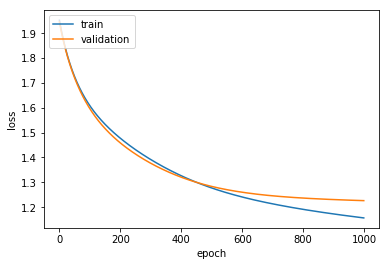

In [96]:
plt.plot(model_with_half_time_statistics_history.history['loss'])
plt.plot(model_with_half_time_statistics_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

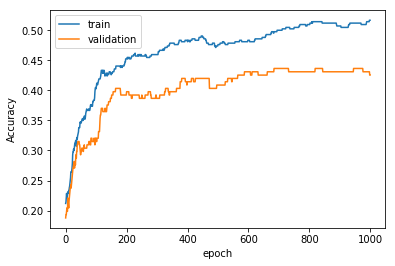

In [49]:
plt.plot(model_with_half_time_statistics_history.history['acc'])
plt.plot(model_with_half_time_statistics_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
#save the model for prediction
model_with_half_time_statistics_json = model_with_half_time_statistics.to_json()
with open("with_halftime_details_model.json", "w") as json_file:
    json_file.write(model_with_half_time_statistics_json)
# serialize weights to HDF5
model_with_half_time_statistics.save_weights("with_halftime_details_model.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
# # load with halftime json and create model
# json_file = open('with_halftime_details_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("with_halftime_details_model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# score = loaded_model.evaluate(Xtest_with_halftime, Ytest_with_halftime, verbose=2)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1] * 100)

Loaded model from disk


ValueError: Error when checking target: expected dense_4 to have shape (7,) but got array with shape (1,)